In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [2]:
df = pd.read_csv("Heart_Disease.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [6]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
df.isnull()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [9]:
df["hd"].value_counts()

0    164
1    139
Name: hd, dtype: int64

In [10]:
len(df.loc[(df['ca']  == '?')
          | 
          (df['thal']  == '?')])

6

In [11]:
df_no_missing = df.loc[(df['ca']  != '?')
          & 
          (df['thal']  != '?')]

In [12]:
len(df_no_missing)

297

In [13]:
df_no_missing['ca'].unique()

array(['0', '3', '2', '1'], dtype=object)

In [14]:
X = df_no_missing.drop("hd", axis=1).copy() # X= df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [15]:
Y = df_no_missing["hd"].copy()
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
# y_not_zero_index = Y>0
# Y[y_not_zero_index]= 1
# Y.unique()

In [17]:
df_no_missing["hd"].value_counts()

0    160
1    137
Name: hd, dtype: int64

C:\Users\noors\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


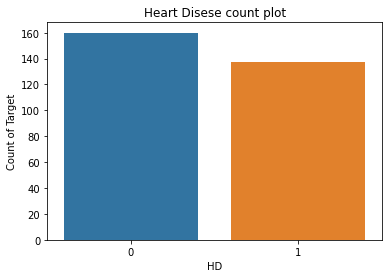

In [18]:
sns.countplot(df_no_missing["hd"])
plt.xlabel("HD")
plt.ylabel("Count of Target")
plt.title("Heart Disese count plot")
plt.show()

In [19]:
X.shape

(297, 13)

In [20]:
Y.shape

(297,)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 99)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(criterion ="gini",
                           max_depth =8,
                           min_samples_split =10,
                           random_state=5)


In [23]:
clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [24]:
clf.feature_importances_

array([0.08258658, 0.03985238, 0.1586959 , 0.06409598, 0.06574435,
       0.00415034, 0.01219112, 0.09559485, 0.05416539, 0.12151325,
       0.02638151, 0.1048506 , 0.17017777])

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [27]:
confusion_matrix(Y_test,y_pred)

array([[34,  4],
       [ 7, 30]], dtype=int64)

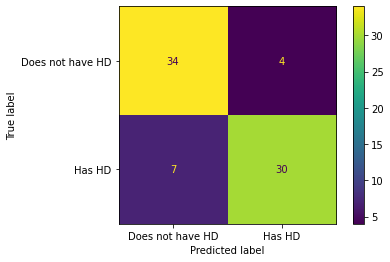

In [28]:
plot_confusion_matrix(clf,X_test, Y_test, display_labels=["Does not have HD", "Has HD"])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8533333333333334

<AxesSubplot:xlabel='tree'>

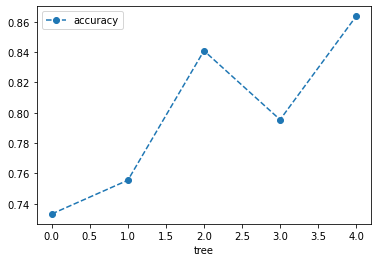

In [30]:
scores = cross_val_score(clf,X_train,Y_train, cv=5)

df = pd.DataFrame(data={'tree': range(5),'accuracy': scores})
df.plot(x='tree', y='accuracy', marker ='o',linestyle='--')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.81      0.88      0.85        34

    accuracy                           0.85        75
   macro avg       0.85      0.86      0.85        75
weighted avg       0.86      0.85      0.85        75



# Grid Search to find out optimal Parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Use GridSearchCV to find the optimal hyperparameters
rf_classifier = RandomForestClassifier(random_state=5)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

In [ ]:
# Access the optimal number of trees (n_estimators)
optimal_n_estimators = grid_search.best_estimator_.n_estimators
print("Optimal Number of Trees:", optimal_n_estimators)


In [ ]:
# Access the optimal max depth
optimal_max_depth = grid_search.best_estimator_.max_depth
print("Optimal Max Depth:", optimal_max_depth)


# Using Randomised search to find out best parameter

In [46]:
param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(5, 16, 1)),
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [47]:
rf_classifier = RandomForestClassifier(random_state=5)

In [48]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# Use RandomizedSearchCV to find the optimal hyperparameters
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42, scoring='accuracy')

In [49]:
# Print the best parameters and their corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 6}
Best Accuracy: 0.8203030303030303


In [50]:
# Access the optimal number of trees (n_estimators) and max depth
optimal_n_estimators = random_search.best_estimator_.n_estimators
optimal_max_depth = random_search.best_estimator_.max_depth
print("Optimal Number of Trees:", optimal_n_estimators)
print("Optimal Max Depth:", optimal_max_depth)

Optimal Number of Trees: 50
Optimal Max Depth: 6


In [53]:
# Access the feature importances
feature_importances = random_search.best_estimator_.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [54]:
# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
    Feature  Importance
0       age    0.085301
1       sex    0.040617
2        cp    0.152095
3    restbp    0.069378
4      chol    0.070298
5       fbs    0.007603
6   restecg    0.014355
7   thalach    0.105153
8     exang    0.058154
9   oldpeak    0.101533
10    slope    0.032231
11       ca    0.100110
12     thal    0.163172


In [55]:
# Count the number of non-zero feature importances
num_features = np.count_nonzero(feature_importances)

# Print the number of features in the optimized model
print("Number of Features in Optimized Model:", num_features)


Number of Features in Optimized Model: 13
